<a href="https://colab.research.google.com/github/GiselleNidhoggr/python-univesp-ciencia-de-dados/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<center><a href="https://github.com/GiselleNidhoggr"><img src="https://camo.githubusercontent.com/53d7e494936f17400bc3fb524cb730aa76f64c92bd83b2f10d35e500f5f56794/68747470733a2f2f63646e2e646973636f72646170702e636f6d2f6174746163686d656e74732f3836323430303631373631383939373237392f3933303536363832333933363635353336302f6769665f676973656c6c652e676966" width="200" height="180" /></a></center
<h1><center>Olá</center></h1></div>

##Esse repositório foi feito com base em um curso da [NVIDIA](https://www.nvidia.com/en-us/training/).

##A ideia é o estudo e construção de uma rede neural.


###Segue uma música para um pouco de inspiração :)


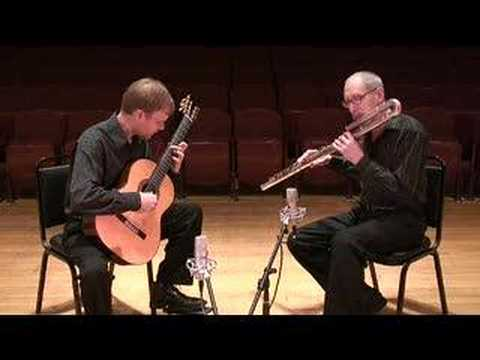

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('jDPH3MrovuQ')

Vamos utilizar a biblioteca [TensorFlow](https://www.tensorflow.org/), uma bilbioteca open-source muito popular para machine learning.

Utilizamos tf.config.list_physical_devices('GPU') para confirmar que TensorFlow está usando GPU, conforme [documentação](https://www.tensorflow.org/guide/gpu).

In [1]:
import tensorflow as tf

print("Numero de GPUs disponíveis: ", len(tf.config.list_physical_devices('GPU')))

Numero de GPUs disponíveis:  0


O estudo da amostra de dados é chamado de "Training dataset" e os dados de validação são chamados de "validation dataset". É importante treinar o modelo e ensina-lo como analisar as imagens, dados e depois utilizar os dados de validação para verificar se o nosso modelo aprendeu corretamente.

Note que usualmente utilizamos:


Training dataset: 2/3

Validation dataset: 1/3

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Esse é um dataset de 60,000 28x28 imagens em tons de cinza, de 10 categorias distintas, possui um test set de 10k fotinhas.

As classes são:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Agora vamos importar a biblioteca [Matplotlib](https://matplotlib.org/) que permite plotar imagens, resultados, etc.

Já selecionamos uma imagem para visualização e fazemos o treinamento com `train_images`

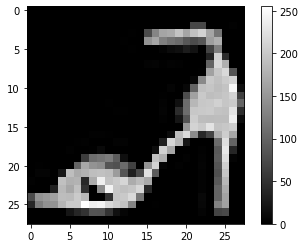

In [4]:
import matplotlib.pyplot as plt

# Pode ser alterado até 59999.
data_idx = 2323

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_labels[data_idx]

5

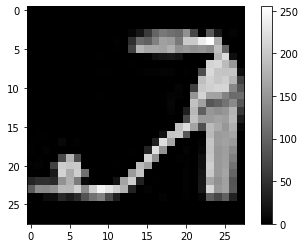

In [7]:
import matplotlib.pyplot as plt

# TPode alterar até 9999.
data_idx = 1212

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
valid_labels[data_idx]

5

In [9]:
# 28 llistas com 28 valores cada, pois cada imagem tem 28x28 pixels
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6,  22,  58, 100, 120, 111, 105, 145,  69,   1,  89,  26,   0,
          4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
         46, 106,  96, 128, 160, 155, 121, 202, 202, 236, 255, 171,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         66, 181, 166, 167, 162, 176, 145, 151, 144, 149, 139, 191, 101,
          0,   0],
       [  

[Keras](https://keras.io/), é uma estrutura de deep learning que foi integrada ao TensorFlow, facilita a construção desse modelo. Usaremos a [API Sequencial](https://keras.io/guides/sequential_model/), que nos permite empilhar [layers](https://keras.io/api/layers/), a lista de operações estaremos aplicando aos nossos dados à medida que são alimentados pela rede.

Temos duas camadas:
* [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) - Converte dados multidimensionais em dados unidimensionais (ex: uma lista de listas em uma única lista).
* [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) - Uma "linha" de neurônios. Cada neurônio tem um peso (`w`) para cada entrada. No exemplo abaixo, usamos o número `10` para colocar dez neurônios.

Também definiremos um `input_shape` que são as dimensões dos nossos dados. Neste caso, nossos pixels `28x28` para cada imagem.

In [10]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

Chamamos o método sumário para verificar a estrutura:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

Esses 10 extra representam cada um dos '10' vieses dos neurônios, o 'b' em 'y = mx + b'.

Há outras maneiras de verificar nosso modelo. Também podemos usar o [plot](https://keras.io/api/utils/model_plotting_utils/):

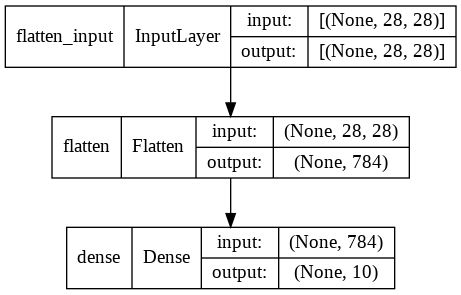

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

Para a classificação do modelo, usamos o método chamado a [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy):
* **Sparse** - para esta função, refere-se a como nosso rótulo é um índice inteiro para nossas categorias
* **Categorical** - esta função foi feita para classificação
* **Cross-entropy** - quanto mais confiante nosso modelo estiver quando fizer uma estimativa incorreta, pior será sua pontuação. Se um modelo estiver 100% confiante quando estiver errado, ele terá uma pontuação de infinito negativo!
* `from_logits` - a saída linear será transformada em uma probabilidade que pode ser interpretada como a confiança do modelo que uma determinada categoria é a correta para a entrada dada.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Para avaliar o modelo, usamos o método [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) .

Uma `epoch` é uma revisão do conjunto de dados de treinamento.

Após cada `epoch`, o modelo será testado com os dados de validação.

In [18]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9578 - accuracy: 0.8084 - val_loss: 13.9391 - val_accuracy: 0.7914
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9802 - accuracy: 0.8084 - val_loss: 11.6846 - val_accuracy: 0.8005
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.0431 - accuracy: 0.8085 - val_loss: 13.5862 - val_accuracy: 0.7981
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.7869 - accuracy: 0.8117 - val_loss: 14.7970 - val_accuracy: 0.7728
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.2194 - accuracy: 0.8103 - val_loss: 11.7851 - val_accuracy: 0.7939


In [19]:
model.predict(train_images[0:10])

array([[-1.78244461e+02, -7.81585999e+02, -7.91409683e+01,
         3.14633560e+01, -2.77987946e+02,  6.65167358e+02,
         1.53621330e+01,  7.79234863e+02,  2.22302032e+02,
         8.32029358e+02],
       [ 3.37780060e+02, -3.00811157e+02,  2.47443497e+02,
         1.80658340e+02, -6.22936707e+01, -1.66879041e+03,
         2.56747437e+02, -3.10842212e+03, -1.51928116e+02,
        -1.17326550e+03],
       [ 1.13220497e+02,  6.32197800e+01,  8.82114410e+01,
         1.32213394e+02,  1.08227226e+02, -6.13588928e+02,
         8.46492996e+01, -7.33349792e+02, -8.35787277e+01,
        -3.53064423e+02],
       [ 1.88885529e+02,  7.83974075e+01,  1.84661469e+02,
         2.24190186e+02,  1.50139481e+02, -8.66365662e+02,
         2.03606216e+02, -1.68596216e+03, -1.29387970e+02,
        -1.13098047e+03],
       [ 2.60841003e+02,  2.21663086e+02,  1.85303864e+02,
         2.87189880e+02,  2.91478149e+02, -1.13141125e+03,
         1.96705063e+02, -1.01132715e+03, -4.37395287e+01,
        -1.

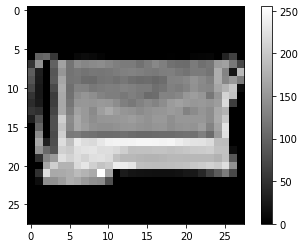

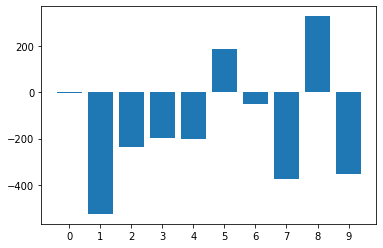

Resposta certa: 8


In [20]:
data_idx = 58500 # Pode alterar até 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("Resposta certa:", train_labels[data_idx])

O melhor seria dar uma olhada na [fonte original](https://colab.research.google.com/github/NVDLI/notebooks/blob/master/building-a-brain/BuildingABrian.ipynb#scrollTo=7wiFSYdcM4Nt), é muito melhor detalhada, mas essa aqui ainda assim vai direto ao ponto :)